# Cosmic Variance

In this project, we will investigate the effects of cosmic variance on the distribution of galaxies in the sky. The Copernican principle tells us that on the whole, the Universe is homogeneous and isotropic: if we point our telescope anywhere in the sky, we should see the same thing in general. However, this does not mean that galaxies are distributed completely randomly throughout the sky. Some galaxies formed earlier and more quickly than others, and their gravitational influence attracts other galaxies towards them. This means that galaxies tend to be more clustered than they would be at random, or put another way, the variance in the number density of galaxies is higher than expected for a random distribution (i.e. Cosmic Variance).

To examine this effect, we use data from the Sloan Digital Sky Survey (SDSS), which maps the positions of hundreds of thousands of galaxies (we only use a high-redshift cut of the sample). The file "lss_data_highz.txt" contains the RA, DEC, and redshift of >50000 galaxies. We will specifically compare the variance in the number of galaxies in a 1degree cylinder with the variance we would expect if galaxies were randomly distributed.

# Libraries

The first thing is to import the relevant libraries.

Installing the astroconda channel from STSCI (https://astroconda.readthedocs.io/en/latest/) is a great way to get all of the libraries that you would need.

The numpy module has a lot of math functionallity (sin, cos, log, multiplying matricies, random numbers, etc...). The astropy module has a lot of astronomy-specific functionallity (cosmological distances, astronomical coordinates, etc...). The matplotlib library is the go-to for plotting

To import a module, you can simply run

import module

However, for modules that are used frequently it is handy to change the module name as in

import module as mod

This allows you to refer to module as mod throughout your code.

Similarly, some sub-modules are used frequently enough that they should be imported as their own thing. This is done with:

from module import submodule

or 

import module.submodule as sub

In [1]:
import numpy as np
from astropy import units, coordinates
import matplotlib.pyplot as plt

# Python Data types

There are many python data types, but the three most useful are numbers (which can be either integers or floating-point (i.e. rational) numbers), strings, and lists

Python lists are notable because they can hold multiple types of data; they do not all have to be the same type

Variable names must start with a letter or the "_" character.
Variable names can contain any arrangement of alphanumeric characters and "_"s 
Variable names are case sensitive

In [2]:
a=5 #integer
c=7 #integer
b=5.5 #float
stringvar='str' #string
lsts=[5,3.3,'a21','x'] #list

In [3]:
print(A) #doesn't work because variable names are case sensitive

NameError: name 'A' is not defined

Mathmatical operations of numbers behave in a way that you would expect:

In [6]:
print(a/b) #a divided by b
print(c/a) #c divided by a. Note that python performs floating-point, rather than integer
           #division by default
print(c//a) #the // operation specifies integer division (returns the number of whole
            #times that c goes into a)

0.9090909090909091
1.4
1


In [7]:
a*b #a times b

27.5

In [8]:
a**b #a to the power of b

6987.712429686842

More advanced math operations can be performed with the numpy module:

In [9]:
print(np.cos(a)) #cosine of a
print(np.exp(a)) #e^a

0.2836621854632263
148.4131591025766


We can access individual elements in the list with "[]". The items are numbered starting with 0.

In [10]:
lsts[0] #the first (or "zeroth" element in lsts)

5

You can also refer to elements in reverse order using negative indices

In [11]:
print(lsts[-1])
print(lsts[-2])

x
a21


Because lists are not assumed to contain numbers, mathmatical operations don't work with them in the way you might expect

In [12]:
print(lsts*2) #doesn't perform 2*lsts like vector multiplication, but rather repeats list
print(lsts+2) #doesn't work

[5, 3.3, 'a21', 'x', 5, 3.3, 'a21', 'x']


TypeError: can only concatenate list (not "int") to list

# Reading data from a file

If your data is in a simple tab or comma seperated file, contains only numbers (no strings, NANs, or anything else), and no rows are missing data, the most straightforward way to read in the data is using the numpy loadtxt method. This will read the file into a 2-dimensional array

In this case, we are reading in a file with 3 columns and 72871 rows. Each row refers to a galaxy in the Sloan Digital Sky Survey. The first column refers to its Right Ascension (RA), the second column refers to its declination (Dec), and the third column refers to its redshift

In [13]:
lsshighz=np.loadtxt('lss_data_highz.txt')

In [14]:
print(lsshighz)

[[1.78725681e+00 1.27012543e+00 1.01845019e-01]
 [5.73696491e+00 1.26548143e+00 1.59083009e-01]
 [2.53015363e+01 1.26889127e+00 1.75503388e-01]
 ...
 [1.62082142e+02 9.12488192e+00 2.21458241e-01]
 [1.62792858e+02 9.06585769e+00 2.21193537e-01]
 [1.61908443e+02 9.52233563e+00 1.17346771e-01]]


# Numpy arrays

lsshighz is a numpy array, which is different from a list in that it must contain all of the same datatype. Therefore, you can do vector multiplication with them in the way you would expect.

In [15]:
print(lsshighz*5) #multiplies all elements in array by 5

[[8.93628403e+00 6.35062714e+00 5.09225093e-01]
 [2.86848245e+01 6.32740717e+00 7.95415044e-01]
 [1.26507682e+02 6.34445635e+00 8.77516940e-01]
 ...
 [8.10410710e+02 4.56244096e+01 1.10729121e+00]
 [8.13964289e+02 4.53292885e+01 1.10596769e+00]
 [8.09542213e+02 4.76116782e+01 5.86733855e-01]]


You can refer to individual elements of this array can be accessed through "[row, column]"

In [16]:
print(lsshighz[0,1]) #zeroth row, oneth column

1.2701254277073921


You can also refer to whole rows or columns with ":"

In [17]:
print(lsshighz[0,:]) #all columns in first row

[1.78725681 1.27012543 0.10184502]


In [18]:
print(lsshighz[:,0]) #all rows in first column

[  1.78725681   5.73696491  25.30153634 ... 162.08214204 162.79285783
 161.90844264]


You can also use ":" to refer to ranges within arrays

In [19]:
print(lsshighz[0:5,0]) #the first 5 elements in the first column

[ 1.78725681  5.73696491 25.30153634 55.30701223 55.87085126]


# Plotting

If you are in a notebook, the %matplotlib inline is necessary to put the plots in the notebook. Otherwise it will try (and not necessarily succeed) to show them in a new window

In [20]:
%matplotlib inline

To get a sense of the data, it is useful to plot it. Here I want to plot the RA vs Dec of the galaxy sample.

The plt.plot command is the workhorse here. The first input is an array (or list) of the x values, and the second input is an array (or list) of the y values.

By default, all points are connected with lines. In astronomy, that is often times not the best way to plot the points, so we can specify some additional parameters to clarify how to draw the points.

The third parameter is an optional keyword specifying how to draw the points. In this case, I specify "o", which specifies that points should be plotted.

You can also specify a lot of additional parameters, like the marker size, marker shape, or marker color (the top-level documentation lists 42 parameters that you can modify). Here I lower the transparency of my points because there are so many using the "alpha" keyword (alpha=0.1 corresponds to 10% transparency)

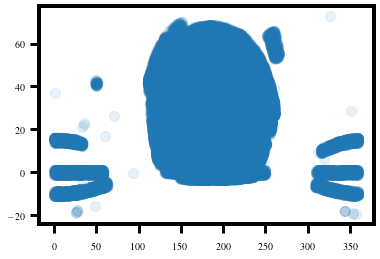

In [21]:
plt.plot(lsshighz[:,0],lsshighz[:,1],'o',alpha=.1)

Note the unusuall shape of the points! There are a few things affecting where these points are on the sky.

1. All of the data in this sample was taken from the Apache Point Observatory in New Mexico. Because the telescope can't look through the Earth, there are no points below about -20 degrees declination

2. A large amount of data is excluded from a u-shaped region on the sky. This is where the Milky-Way galaxy is. There is too much stuff in the way in those regions of the sky for us to see galaxies in the background, so there are no galaxies there.

3. A few stripes and sections of data are targeted for repeat deeper observations (the line of points at dec=0 corresponds to what is known as Stripe-82).

# Data Selection

Because the data does not uniformly cover the whole sky, we want to select the regions that are appropriate for our experiment. In this case we want to make sure that we are not close to an edge. Because we are interested in how much galaxies are clustered together, we want to make sure we can see all of the galaxies around our point of interest. By roughly looking around the plot, I can tell that selecting points from RA=140 to RA=230 and Dec=3 to Dec=60 will be satisfactory for our analysis.

To make this selection, we will make use of the numpy "where" command.

In parenthesis, we specify our conditions. The conditions are formatted as: "array" "comparison" "array or value". Where will use "comparison" to compare the first array with the second array or value. The "where" command will return all of the indices for which the comparison is True. 


It is worthwhile breaking this down because "where" is such a usefull and common command in astronomy, and it can get kind of confusing in python. If just do the comparison part, you will get an array of True, False values that are the result of the comparison.

In [22]:
print(lsshighz[:,0]>140) #test if RA>140
print(lsshighz[:,0]<230) #test if Dec<230

[False False False ...  True  True  True]
[ True  True  True ...  True  True  True]


We can combine comparisions using "&" or "|" which do "and" and "or" operations. Multiple comparisons must be separated with parenthesis. Note that any combination is allowed as long as all comparisons are the same shape.

In [23]:
print((lsshighz[:,0]>140) & (lsshighz[:,0]<230)) #test if RA>140 and RA<230
print((lsshighz[:,0]>140) | (lsshighz[:,1]<35)) #test if RA>140 or Dec<35

[False False False ...  True  True  True]
[ True  True  True ...  True  True  True]


The where command finds all of the indices to the result array that are True.

In [24]:
wselection=np.where((lsshighz[:,0]>140) & (lsshighz[:,0]<230) & 
                    (lsshighz[:,1]>3) & (lsshighz[:,1]<60)) #find indices of array in selection box 
print(wselection)

(array([ 3967,  3968,  3969, ..., 72868, 72869, 72870]),)


For one and two dimensional comparisons, "where" returns a two-item set. For n>2 dimensional comparisons, "where" returns an n dimensional set. The "i"th item in the set is an array of indices for the array. I'm not really sure of the reason that where returns a two item set for one-dimensional comparisons, it is just the way it is. This ultimately means that it is often useful to identify the zeroth element in your where command.

In [25]:
wselection=np.where((lsshighz[:,0]>140) & (lsshighz[:,0]<230) & 
                    (lsshighz[:,1]>3) & (lsshighz[:,1]<60))[0] #find indices of array in selection box 
print(wselection)

[ 3967  3968  3969 ... 72868 72869 72870]


If we plot up the points in this selection, we can check that they satisify the crieteria

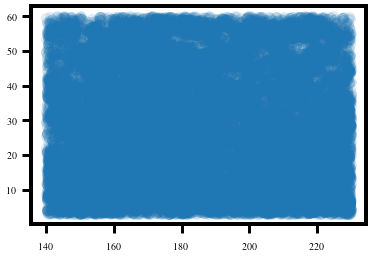

In [26]:
plt.plot(lsshighz[wselection,0],lsshighz[wselection,1],'o',alpha=.1)

# Astropy Coordinates

Because we will use astronomical coordinates a lot in this project (and a lot in general), we want to set up an object that handles coordinates easily and efficiently. This is done with the astropy.coordinates module.

coordinates.SkyCoord(ra=ravals,dec=decvals) creates the object we are interested in. SkyCoord is a class of coordinates that has a lot of usefull methods attached to it. Astropy is able to do these methods efficiently by organizing the data in its memory when you make the SkyCoord object initially. 

SkyCoord is able to work with a few different formattings of RA and Dec, so it is necessary to specify which one you are giving it. There are a couple ways to do this.

1. Use the units module. ravals*units.deg will specify that ra values are in units of degrees


In [27]:
sdsspts=coordinates.SkyCoord(ra=lsshighz[wselection,0]*units.deg,
                             dec=lsshighz[wselection,1]*units.deg) 
print(sdsspts)

<SkyCoord (ICRS): (ra, dec) in deg
    [(148.29370663, 59.14150825), (149.27635681, 59.60941148),
     (149.61703061, 59.53259794), ..., (162.08214204,  9.12488192),
     (162.79285783,  9.06585769), (161.90844264,  9.52233563)]>


2. Format the coordinate strings. If ravals is a string foramtted with hms, dms (ravals=['03h02m05s','05h03m02s']), then SkyCoord can understand the coordinates.

In [29]:
otherpts=coordinates.SkyCoord(ra=np.array(['03h02m05s','05h03m02s']),
                     dec=['2d3m2s','5d3m2s'])
print(otherpts)

<SkyCoord (ICRS): (ra, dec) in deg
    [(45.52083333, 2.05055556), (75.75833333, 5.05055556)]>


3. Specify format with the unit keyword.

In [30]:
othercoords2 = coordinates.SkyCoord(["1:12:43.2 +31:12:43", "1 12 43.2 +31 12 43"],
                                    unit=(units.hourangle, units.deg))
print(othercoords2)

<SkyCoord (ICRS): (ra, dec) in deg
    [(18.18, 31.21194444), (18.18, 31.21194444)]>


## Cosmic Variance

On large scales (more than a few hundred mega-parcecs (Mpc), corresponding to a couple dozen degrees on the sky for the galaxies in our sample), the distribution of galaxies on the sky is very uniform. This is apparent in our plot in line 26. There is no region of the sky that has a large clump or void of galaxies. However, on smaller scales that is not the case. For example, we know of galaxy clusters (~1 Mpc in radius) corresponding to a large overdensity of galaxies (e.g. https://en.wikipedia.org/wiki/Coma_Cluster) or voids corresponding to a substantial underdenisty of galaxies.

We can see this in our data by zooming in on a particular region of sky. Note that some areas are more densely populated than others.

(5, 20)

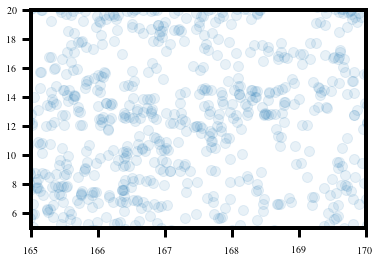

In [31]:
plt.plot(lsshighz[wselection,0],lsshighz[wselection,1],'o',alpha=.1)
plt.xlim(165,170) #this restricts the x axis to between 165 and 170
plt.ylim(5,20) #this restricts the y axis to between 5 and 20

This is an important effect to keep in mind when designing a survey of galaxies like SKYSURF. If all of our Hubble Space Telescope (HST) targets are from the same  region of the sky, we might overestimate or underestimate the overall density of galaxies (note that HST's field of view is only ~1/30 degree on a side, corresponding to slightly less than 1 Mpc for most of the galaxies we will see in our survey - definitely not a big enough area). Furthermore, a lot of galaxy properties depend on whether it lives in an over-dense or under-dense region of the sky, so if we target an over-dense or under-dense region in our survey, we may infer incorrect conclusions about galaxies in general. The solution to this problem is to target a large number of independent regions on the sky, so even if one is over- or under-dense, we have enough independent measurements.

## Random numbers

The first thing that we will do with this project is conduct a measurement of Cosmic Variance. There are a few ways to quantify this, but for now, we will want to look at the distribution of the number of galaxies around random points on the sky.

To do this, we will use the numpy random module. Numpy.random.rand will give you a set of random number between 0 and 1.

In [32]:
np.random.rand(10,2) #the 10, 2 specify the shape of the array that you will get

array([[0.51850389, 0.60131615],
       [0.01084598, 0.41473105],
       [0.53936055, 0.5492592 ],
       [0.66672574, 0.5489608 ],
       [0.50212495, 0.88489829],
       [0.99230036, 0.31201772],
       [0.48257071, 0.42417146],
       [0.01354918, 0.60836526],
       [0.99429705, 0.87567791],
       [0.98942697, 0.65844543]])

It's worth considering how python does this. Of course, there is no physical coin or dice in the computer that python tosses to get a random number. In python's memory, there is a list or uncorrelated and uniformly distributed (so apparently random) numbers. When you start your python session, it uses your system time to pick a point in that list. Then, every succesive time that you ask for a random number, python simply goes to the next number in the list.

The consequence of this is if you want to reproduce a set of random numbers, you can tell python where to start on the list -- called the random seed -- and python will always give you the same random numbers. This is particularly useful if you use random numbers to make a plot, but you want the plot to be reproducible.

This module can also give you normally-distributed numbers.

In [33]:
np.random.randn(10,2) #the 10, 2 specify the shape of the array that you will get

array([[-0.23257114,  0.21854572],
       [-2.02439105, -0.53140956],
       [-0.32302193,  0.79461316],
       [ 2.77073304, -0.53936048],
       [-1.16148172,  1.26558683],
       [-1.35039525, -1.94235192],
       [-0.59030376, -0.61923583],
       [-0.32047579,  0.55804423],
       [-0.57225695,  1.30835285],
       [ 1.04222314, -0.10562906]])

We want our random points to have the same ra and dec range as our galaxies, so lets get some random points with that range. By multiplying by (230-140), we stretch the 0-1 random number range to a range of 0-90. By adding 140, we shift the range to 140-230. We apply a similar procedure to declinations.

In [34]:
rra=np.random.rand(1000)*(230-140)+140
rdec=np.random.rand(1000)*(60-3)+3

Plotting these random points shows a set of points in the correct range.

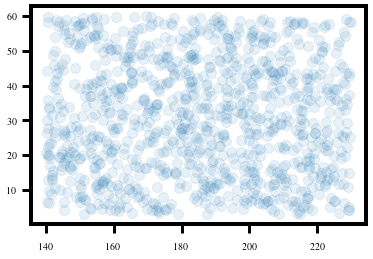

In [35]:
plt.plot(rra,rdec,'o',alpha=.1)

## Random Pointings

However, generating random points on a sphere is not as simple as that. If you randomly select ra and dec you will oversample points at the poles and undersample points at the equator (http://mathworld.wolfram.com/SpherePointPicking.html).

The above random points have the same number of points between 50-60 degrees declination as between 10-20 degrees declination; however, there is only 1/2 the area between 50-60 degrees as between 10-20 degrees. This means that the points are not randomly distributed across the sky. We need to revise our method for getting random points. Thankfully, the equations 1 and 2 on the above website allow us to transform the 0-1 random numbers to correctly distributed points.

Becasue we will be doing this operation frequently, we will make a "function" for it. This function is similar to the np.random.rand function, but rather than returning a random number between 0 and 1, it returns a set of random points on the celestial sphere.

We define a function by having "def(argument1, argument2, argument3...):" and writing our function indented below that. Once we call the function later in the program, everything inside the function will run. A return statement at the end of a function will end the function and give the user the values you return.

An important note is that the arguments, as well as all variables defined in the function, are "local" variables, meaning that once we are inside the function, they take the value values given when we call the function, rather than any values assigned to them outside the function. Any changes to variables made inside the function will not be reflected outside the function. You can try:

a=5<br>
def printa(a):<br>
&nbsp;&nbsp;&nbsp;&nbsp;c=9<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(a)<br>
printa(9) #will print 9<br>
print(c) #error<br>


However, anything not included in the argument list will maintain its value:

a=5<br>
b=3<br>
def printab(a):<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(a+b)<br>
printab(8) # will print 11

In [36]:
#This function generates random points on the celestial sphere following: http://mathworld.wolfram.com/SpherePointPicking.html (1)
#The syntax is ra_pts,dec_pts=getrandompoints(numpoints,ra_range,dec_range),
#where numpoints is the number of points you want and ra_range and dec_range are  2 element lists
#specifying the range in ra and dec respectively
def getrandompoints(num,rarange,decrange):
    #first we generate a large list of uniformly distributed random numbers for u and v in (1)
    #we generate 10 times more numbers than we need because our points will be randomly distributed throughout the whole sphere,
    #and we will have to cut any objects outside the desired range
    uv=np.random.rand(num*10,2)
    
    ra=2*np.pi*uv[:,0]*180/np.pi #equation 1 in (1) converted to degrees
    dec=np.arccos(2*uv[:,1]-1)*180/np.pi-90 #equation 2 in (1) converted to degrees and shifted from polar=0 to equator=0 coordinates
    
    w=np.where((ra<rarange[1]) & (ra>rarange[0]) & 
               (dec<decrange[1]) & (dec>decrange[0]))[0][0:num] #here we select only the first num objects in our range
    return ra[w],dec[w]

Using this method, we generate 1000 random pointings on the sky within our galaxy selection. Note that we dont want our random points to go to the edge of the sample so they aren't missing 1/2 of the galaxies.

In [37]:
randpointings=getrandompoints(1000,[150,220],[13,50])

We can run the plot command twice in once cell to plot multiple datasets. Note that there are more orange points towards the bottom - this is a consequence of our correct point sampling.

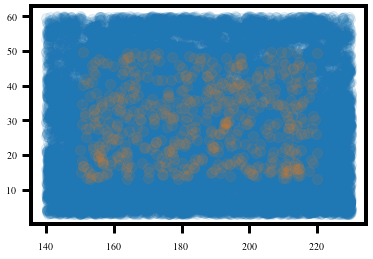

In [38]:
plt.plot(lsshighz[wselection,0],lsshighz[wselection,1],'o',alpha=.1)
plt.plot(randpointings[0],randpointings[1],'o',alpha=.1)

## The Number of Galaxies by a Random Point

To estimate the effect of cosmic variance, we will check each of the random points to see how many galaxies are nearby it. For now, we will define "nearby" to mean within 1 degree on the sky, but in principle, you could impose a variety of conditions.

To do this, we first make "SkyCoords" of the random galaxy points and the test points for easier calculation

In [52]:
rpts=coordinates.SkyCoord(randpointings[0]*units.deg,
                         randpointings[1]*units.deg)

The "separation" allows for accurate measurements of on sky separations. For small (1 arcsecond or less) separations, separation^2=(ra1-ra2)^2+(dec1-dec2)^2 works, but for larger separations, more accurate formulae are necessary.

Note that we can call the "separation" function on the coordinate object itself, rather than the module that it comes from. The method is attached to the coordinate object itself, rather than the module.

In [40]:
rpts[0].separation(sdsspts[0]) #angular separation between first random point and first galaxy

<Angle 35.38650805 deg>

Notably, we can calculate the separations of lots of coordinates as well. Because of the way that python stores data, this is actually quicker than going through each point individually. However, there is no straightforward way to do the whole matrix: you can calculate all the distances between one point and an array and you can calculate all the distances between an array and one point, but you can't in one line calculate the distances between two arrays of points

In [41]:
rpts[0].separation(sdsspts)

<Angle [35.38650805, 35.68332458, 35.56118284, ..., 15.71908034,
        15.88475137, 15.30277017] deg>

Here is where we do our experiment. We first initialize an empty list. Each element in this list will be a number corresponding to the number of galaxies within 1 degree of that random point.

In [42]:
nin1=[]

Next, we loop through all random pointings. The most common way to go through a loop in python is a for loop. The syntax is:

for i in blank:<br>
&nbsp;&nbsp;&nbsp;&nbsp;stuff in loop

blank is a variable that has many elements (known as an "iterable" object, like a list or array). i will take all of the values of blank in order during the course of the loop (range(number) which gives the list [0,1,2,3,...,number-1] is commonly used as blank). Similarly to the function declaration, the colon is necessary to start the loop, and anything indented after the first line is considered to be part of the stuff in the loop.

In [43]:
for i in range(len(rpts)): #len(rpts) is the number of elements in rpts
    #rpts[i] refers to the random pointing we are testing this iteration
    #so the first line in the loop uses the where statement to find all
    #of the galaxies within 1 degree of the random point
    
    #note that the astropy units module is smart enough to know that 1
    #degree is larger than 20'. If you are not using the units module,
    #be careful about that
    pointsin1=np.where(rpts[i].separation(sdsspts)<1*units.deg)[0]
    #the number of points satisified by the "where" crieteria is the 
    #number that we are looking for, so we note that number in the list
    
    nin1.append(len(pointsin1)) #list.append(x) adds x to the end of list

In [44]:
print(nin1) #number of galaxies within 1 degree of each random point

[18, 8, 18, 22, 63, 11, 40, 16, 26, 33, 17, 30, 30, 10, 24, 22, 22, 20, 49, 32, 20, 14, 27, 18, 24, 28, 28, 21, 16, 29, 22, 22, 28, 35, 47, 49, 27, 24, 24, 24, 37, 28, 12, 29, 22, 46, 31, 26, 25, 20, 12, 21, 28, 15, 42, 34, 31, 48, 23, 18, 21, 34, 24, 31, 38, 30, 27, 31, 27, 45, 28, 32, 26, 46, 40, 23, 56, 38, 44, 34, 38, 23, 35, 44, 32, 37, 17, 59, 29, 56, 30, 27, 54, 10, 7, 30, 64, 21, 35, 16, 23, 27, 12, 21, 26, 16, 27, 40, 34, 14, 33, 8, 27, 20, 28, 26, 18, 28, 36, 26, 13, 27, 4, 34, 33, 30, 26, 23, 13, 22, 46, 22, 28, 55, 5, 23, 22, 14, 39, 37, 13, 32, 34, 14, 12, 13, 52, 21, 24, 10, 29, 24, 29, 23, 15, 30, 38, 40, 13, 22, 23, 35, 36, 16, 30, 20, 32, 35, 24, 33, 46, 33, 32, 27, 30, 22, 27, 20, 15, 57, 31, 39, 28, 24, 47, 19, 9, 43, 13, 28, 9, 23, 26, 29, 27, 20, 43, 30, 45, 14, 46, 38, 24, 12, 36, 32, 38, 35, 42, 20, 24, 16, 54, 24, 6, 23, 52, 8, 16, 20, 30, 22, 22, 24, 19, 7, 25, 31, 17, 14, 20, 16, 20, 28, 22, 29, 58, 50, 32, 27, 11, 33, 32, 26, 18, 22, 28, 21, 28, 27, 32, 22, 2

To see what the distribution of these look like, we can plot the histogram using the plt.hist command.

Text(0, 0.5, 'Number of random points with that many galaxies around it')

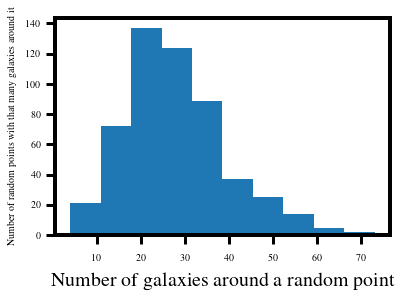

In [45]:
plt.hist(nin1)
plt.xlabel('Number of galaxies around a random point',fontsize=20) #x axis label
plt.ylabel('Number of random points with that many galaxies around it',fontsize=10) #y axis label

In [47]:
randpoints=getrandompoints(len(sdsspts),[140,230],[3,60]) #simulated galaxy positions

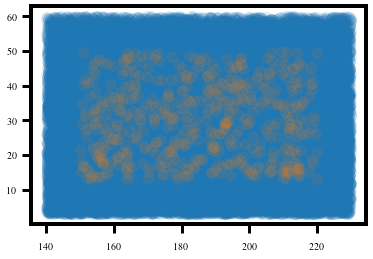

In [49]:
plt.plot(randpoints[0],randpoints[1],'o',alpha=.1)
plt.plot(randpointings[0],randpointings[1],'o',alpha=.1)

In [53]:
tstpts=coordinates.SkyCoord(ra=randpoints[0]*units.deg,dec=randpoints[1]*units.deg)

In [54]:
nin1_sim=[]
for i in range(len(rpts)): #len(rpts) is the number of elements in rpts
    #rpts[i] refers to the random pointing we are testing this iteration
    #so the first line in the loop uses the where statement to find all
    #of the galaxies within 1 degree of the random point
    
    #note that the astropy units module is smart enough to know that 1
    #degree is larger than 20'. If you are not using the units module,
    #be careful about that
    pointsin1=np.where(rpts[i].separation(tstpts)<1*units.deg)[0]
    #the number of points satisified by the "where" crieteria is the 
    #number that we are looking for, so we note that number in the list
    
    nin1_sim.append(len(pointsin1)) #list.append(x) adds x to the end of list

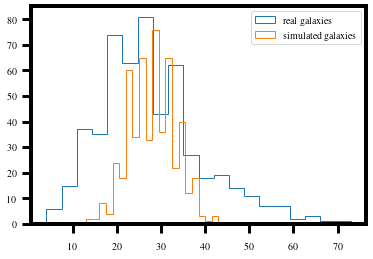

In [55]:
plt.hist(nin1,bins=20,histtype='step',label='real galaxies')
plt.hist(nin1_sim,bins=20,histtype='step',label='simulated galaxies')
plt.legend()

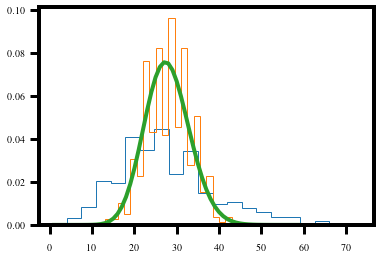

In [58]:
from scipy.special import gamma
plt.hist(nin1,bins=20,histtype='step',label='real galaxies',density=True)
plt.hist(nin1_sim,bins=20,histtype='step',label='simulated galaxies',density=True)
plt.plot(np.arange(1,60),np.mean(nin1)**np.arange(1,60)*
         np.exp(-np.mean(nin1))/gamma(np.arange(1,60)+1))

In [60]:
print(np.std(nin1),np.std(nin1_sim))

11.681467931181558 5.23248350249923


In [61]:
print(np.mean(nin1),np.mean(nin1_sim))

27.806083650190114 27.783269961977187


In [62]:
def variance_from_angle(angle):
    nin_angle=[]
    for i in range(len(rpts)):
        points_in_angle=np.where(rpts[i].separation(sdsspts)<angle)
        nin_angle.append(len(points_in_angle[0]))
    return np.mean(nin_angle),np.std(nin_angle)

In [63]:
variance_from_angle(2*units.deg)

(110.81558935361217, 35.1646078167184)

In [64]:
tstangles=np.logspace(-2,1,num=10)*units.deg

In [65]:
print(tstangles)

[ 0.01        0.02154435  0.04641589  0.1         0.21544347  0.46415888
  1.          2.15443469  4.64158883 10.        ] deg


In [66]:
meanns=[]
meansigs=[]
for i in range(len(tstangles)):
    print(i)
    resi=variance_from_angle(tstangles[i])
    meanns.append(resi[0])
    meansigs.append(resi[1])

0
1
2
3
4
5
6
7
8
9


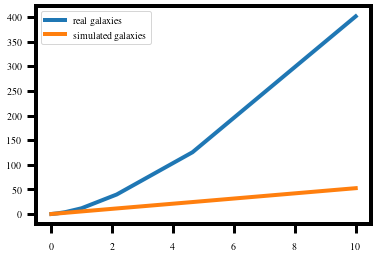

In [69]:
plt.plot(tstangles,np.array(meansigs),label='real galaxies')
plt.plot(tstangles,np.sqrt(np.array(meanns)),label='simulated galaxies')
plt.legend()

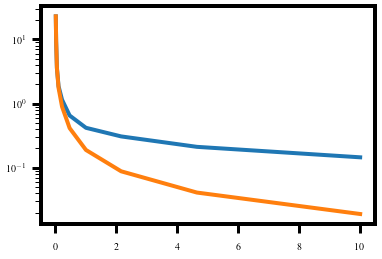

In [71]:
plt.plot(tstangles,np.array(meansigs)/np.array(meanns),label='real galaxies')
plt.plot(tstangles,np.sqrt(np.array(meanns))/np.array(meanns),label='simulated galaxies')
plt.yscale('log')